# **Notebook 1: Neural Network from scratch**

Mario Pedol (830296), 
Veronica Morelli (839257).


To develop the project we use the dataset available on Kaggle at the following link: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset. The dataset is called *Rice Image Dataset*. It contains 75K images including 15K images for each rice variety that are: Arborio, Basmati, Ipsala, Jasmine and Karacadag.

We decide to use the dataset to solve a **classification problem**. We want to find a performing deep learning model to correctly classify 5 types of rice.

In this notebook we propose several **Neural Networks from scratch**.

We start from a basic neural network with only 2 convolutional layers and we try to improve its performances doing a lot of testings.

## 1) **Environment Set Up**

This section is made to configure the environment, import useful libraries and set up the directories:

In [ ]:
# Import main libraries

from time import time
from datetime import datetime
from google.colab import drive

import cv2
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img
print('TensorFlow version:', tf.__version__)

import zipfile
from shutil import copyfile

from matplotlib import pyplot as plt

import numpy as np
import random as python_random

import glob
import shutil
from random import seed
from random import random
import os
import os.path


from IPython.display import Javascript


TensorFlow version: 2.8.2


In [ ]:
# Set seed for reproducibility

!PYTHONHASHSEED = 0

np.random.seed(0)
python_random.seed(0)
tf.random.set_seed(0)

/bin/bash: PYTHONHASHSEED: command not found


In [ ]:
# Settings for prettier visualization

def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'))

get_ipython().events.register('pre_run_cell', resize_colab_cell)

In [ ]:
# Mount GDrive
drive.mount('/content/gdrive/', force_remount = True) 

<IPython.core.display.Javascript object>

Mounted at /content/gdrive/


In [ ]:
# Settings for prettier visualization in Google Colab

from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
keras.__version__

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'2.8.0'

In [ ]:
# Import other modules
from matplotlib import pyplot as plt
import zipfile
from shutil import copyfile
from time import time
import numpy as np
import random as python_random

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4) **Preprocessing** and + **Splitting data into training e validation**

Before proceeding to the actual analysis phase, it is necessary to define the whole dataset into two datasets: **training set** and **validation set**. 80% of the data is contained in the training while 20% of the data is contained in the validation.

On the training dataset, the data are standardized (rescale=1.0/255.0). In addition, to make the classificatory model as generalizable as possible on new data, the technique of data augmentation is used. Data augmentation creates a more complete and consistent set of data.

On the validation dataset, the data are only standardized (rescale=1.0/255.0).

Finally, two **data loaders** are defined.

The batch size is set to 32. The images are risized from 250x250 to 224x224 dimension.




In [ ]:
from keras.preprocessing.image import ImageDataGenerator

<IPython.core.display.Javascript object>

In [ ]:
# Training dataset: standardization + data augmentation

train_datagen_rescale_augm = ImageDataGenerator(rescale=1.0/255.0,
                                                width_shift_range = 0.1,
                                                height_shift_range = 0.1,
                                                horizontal_flip = True,
                                                vertical_flip = True,
                                                rotation_range = 20,
                                                validation_split=0.2)

<IPython.core.display.Javascript object>

In [ ]:
# Validation dataset: standardization

validation_datagen_rescale = ImageDataGenerator(rescale=1/255,
                                                validation_split=0.2)

<IPython.core.display.Javascript object>

In [ ]:
# Training data loader

train_generatordb_rescale_augm = train_datagen_rescale_augm.flow_from_directory(base_path,
                                                                                target_size=(224,224),
                                                                                color_mode='rgb',
                                                                                batch_size=32,
                                                                                class_mode='categorical',
                                                                                subset='training',
                                                                                shuffle=True,
                                                                                seed=1)                                                                    


<IPython.core.display.Javascript object>

Found 3840 images belonging to 5 classes.


In [ ]:
# Validation data loader

validation_generatordb_rescale = validation_datagen_rescale.flow_from_directory(base_path,
                                                                                target_size=(224,224),
                                                                                color_mode='rgb',
                                                                                batch_size=32,
                                                                                class_mode='categorical',
                                                                                subset='validation',
                                                                                shuffle=True,
                                                                                seed=1) 

<IPython.core.display.Javascript object>

Found 960 images belonging to 5 classes.


## 5) **Convolutional Neural Networks from scratch**

In [ ]:
num_classes = 5

<IPython.core.display.Javascript object>

## **Principal Steps**

The principal steps to define a Neural Network are the following:

1.	Architecture definition
2.	Compilation: definition of network macro-elements (optimizer, learning rate in the optimizer, loss function, additional metrics, parameters, etc.). 
4.	Training (epochs, batch size, etc.)
5.	Summary and Visualization of the results


##1. **Model v1**

**Architecture Model V1**

* Input Layer
* 2d Convolutional layer (3x3 filter, x32)
* Relu activation
* Max Pooling layer (3x3)
* 2d convolutional Layer (3x3, x64)
* Relu activation
* Global Max Pooling layer
* Dense layer (Softmax Activation)

In [ ]:
# Architecture definition

inputs = keras.Input((224, 224, 3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding = 'same')(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(64, 3, padding = 'same')(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation = 'softmax')(x)
net = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Architecture Summary 

net.summary()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 activation_2 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 activation_3 (Activation)   (None, 75, 75, 64)        0         
                                                           

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

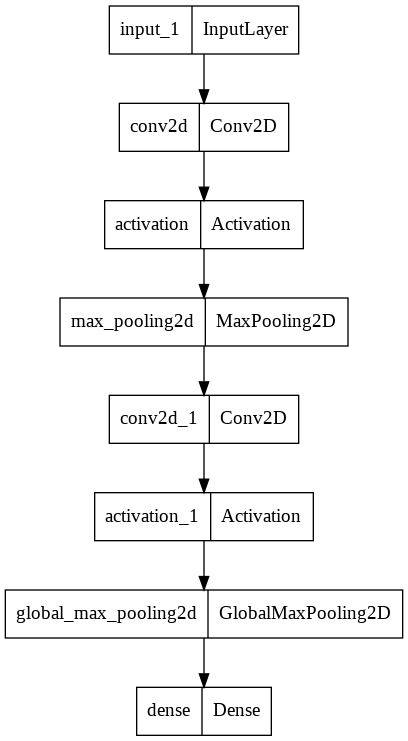

In [ ]:
# Architecture plot

keras.utils.plot_model(net)

In [ ]:
# Network compilation

net.compile(loss = keras.losses.categorical_crossentropy,
            optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
            metrics =['accuracy'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Training
history = net.fit(train_generatordb_rescale_augm,
                  epochs = 40,
                  validation_data = validation_generatordb_rescale);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/40
120/120 [==============================] - 2318s 19s/step - loss: 1.5671 - accuracy: 0.2766 - val_loss: 1.4414 - val_accuracy: 0.5729
Epoch 2/40
120/120 [==============================] - 250s 2s/step - loss: 1.3255 - accuracy: 0.4818 - val_loss: 1.2947 - val_accuracy: 0.3396
Epoch 3/40
120/120 [==============================] - 242s 2s/step - loss: 1.1101 - accuracy: 0.5865 - val_loss: 0.9745 - val_accuracy: 0.6521
Epoch 4/40
120/120 [==============================] - 248s 2s/step - loss: 0.9497 - accuracy: 0.6594 - val_loss: 0.7395 - val_accuracy: 0.7875
Epoch 5/40
120/120 [==============================] - 230s 2s/step - loss: 0.8150 - accuracy: 0.7060 - val_loss: 0.8719 - val_accuracy: 0.6479
Epoch 6/40
120/120 [==============================] - 262s 2s/step - loss: 0.7105 - accuracy: 0.7570 - val_loss: 0.5717 - val_accuracy: 0.7302
Epoch 7/40
120/120 [==============================] - 238s 2s/step - loss: 0.6357 - accuracy: 0.7807 - val_loss: 0.5343 - val_accuracy: 0.73

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

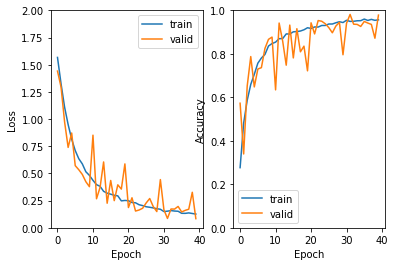

In [ ]:
# Learning curves visualization

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

The model is already good enough with an accuracy of 97.8%. Now we try to improve its performance but also make it more stable.

In [ ]:
# Saving

net.save('/content/gdrive/MyDrive/FDL2022Project/modelli ve/mymodelv1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##2. **Model v2**

We add **batch normalization** to the previous model.

**Architecture Model V2**

* Input Layer
* 2d Convolutional layer (3x3 filter, x32)
* Relu activation
* Batch Normalization layer
* Max Pooling layer (3x3)
* 2d convolutional Layer (3x3, x64)
* Relu activation
* Batch Normalization layer
* Global Max Pooling layer
* Dense layer (Softmax Activation)

In [ ]:
# Architecture definition

inputs = keras.Input((224, 224, 3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding = 'same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(64, 3, padding = 'same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation = 'softmax')(x)
net2 = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

In [ ]:
# Architecture summary

net2.summary()

<IPython.core.display.Javascript object>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496 

<IPython.core.display.Javascript object>

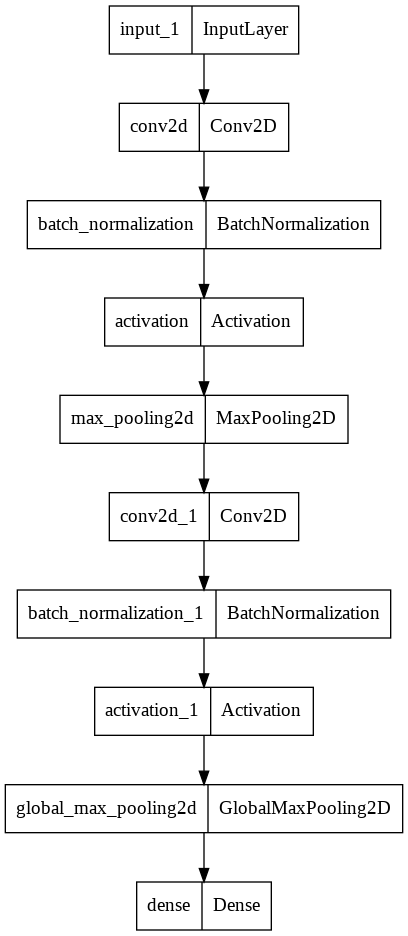

In [ ]:
# Architecture plot

keras.utils.plot_model(net2)

In [ ]:
# Network Compilation

net2.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

<IPython.core.display.Javascript object>

In [ ]:
# Training

history2 = net2.fit(train_generatordb_rescale_augm,
                    epochs = 40,
                    validation_data = validation_generatordb_rescale);

<IPython.core.display.Javascript object>

Epoch 1/40
120/120 [==============================] - 1426s 12s/step - loss: 1.7323 - accuracy: 0.3589 - val_loss: 1.6808 - val_accuracy: 0.2000
Epoch 2/40
120/120 [==============================] - 52s 437ms/step - loss: 0.7956 - accuracy: 0.7016 - val_loss: 2.2112 - val_accuracy: 0.2000
Epoch 3/40
120/120 [==============================] - 52s 431ms/step - loss: 0.5804 - accuracy: 0.7867 - val_loss: 2.4480 - val_accuracy: 0.2000
Epoch 4/40
120/120 [==============================] - 53s 440ms/step - loss: 0.4809 - accuracy: 0.8333 - val_loss: 1.3185 - val_accuracy: 0.4708
Epoch 5/40
120/120 [==============================] - 52s 432ms/step - loss: 0.4090 - accuracy: 0.8594 - val_loss: 0.4933 - val_accuracy: 0.8708
Epoch 6/40
120/120 [==============================] - 51s 428ms/step - loss: 0.3693 - accuracy: 0.8784 - val_loss: 0.9231 - val_accuracy: 0.7125
Epoch 7/40
120/120 [==============================] - 52s 433ms/step - loss: 0.3282 - accuracy: 0.8943 - val_loss: 1.4768 - val_ac

<IPython.core.display.Javascript object>

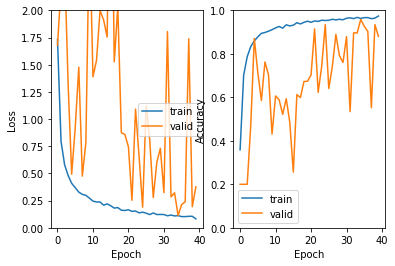

In [ ]:
# Learning curves visualization

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [ ]:
# Saving 

net2.save('/content/gdrive/MyDrive/FDL2022Project/modelli ve/mymodelv2.h5')

<IPython.core.display.Javascript object>

##3. **Model v3**

**Architecture Model V3**

* Input Layer
* 2d Convolutional layer (3x3 filter, x32)
* Relu activation
* Batch Normalization layer
* Max Pooling layer (3x3)
* 2d convolutional Layer (3x3, x64)
* Relu activation
* Batch Normalization layer
* Max Pooling layer (3x3)
* 2d Convolutional layer (3x3 filter, x128)
* Relu activation
* Batch Normalization layer
* Global Max Pooling layer
* Dense layer (Softmax Activation)

In [ ]:
# Architecture definition

inputs = keras.Input((224, 224, 3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding = 'same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(64, 3, padding = 'same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(128, 3, padding = 'same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation = 'softmax')(x)
net3 = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

In [ ]:
# Architecture summary

net3.summary()

<IPython.core.display.Javascript object>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496 

<IPython.core.display.Javascript object>

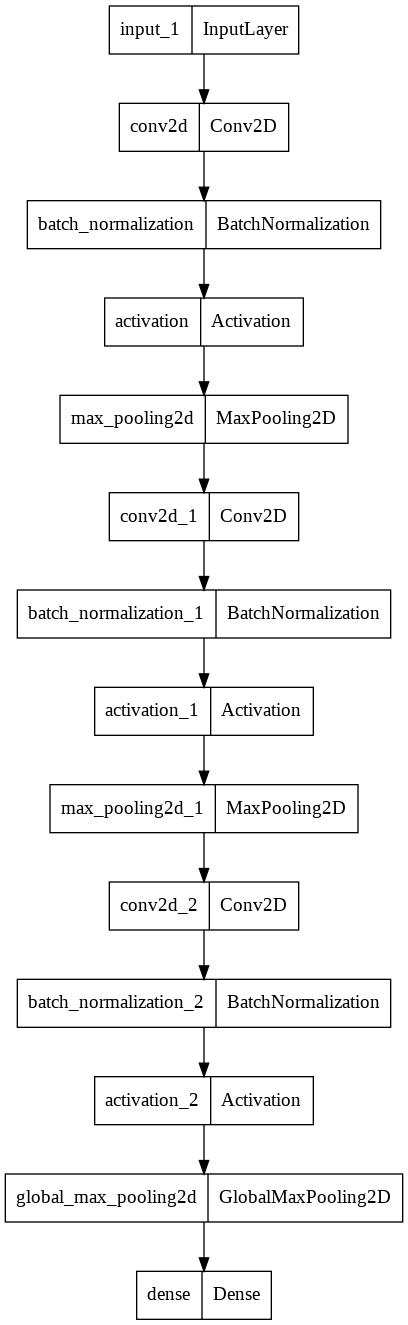

In [ ]:
# Architecture plot

keras.utils.plot_model(net3)

In [ ]:
# Network compilation

net3.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

<IPython.core.display.Javascript object>

In [ ]:
# Training

history3 = net3.fit(train_generatordb_rescale_augm,
                    epochs = 40,
                    validation_data = validation_generatordb_rescale);

<IPython.core.display.Javascript object>

Epoch 1/40
120/120 [==============================] - 1417s 12s/step - loss: 1.1991 - accuracy: 0.6000 - val_loss: 2.5404 - val_accuracy: 0.2000
Epoch 2/40
120/120 [==============================] - 316s 3s/step - loss: 0.3615 - accuracy: 0.8643 - val_loss: 3.1935 - val_accuracy: 0.2219
Epoch 3/40
120/120 [==============================] - 326s 3s/step - loss: 0.2369 - accuracy: 0.9227 - val_loss: 2.5879 - val_accuracy: 0.3844
Epoch 4/40
120/120 [==============================] - 317s 3s/step - loss: 0.1542 - accuracy: 0.9474 - val_loss: 1.6120 - val_accuracy: 0.5917
Epoch 5/40
120/120 [==============================] - 311s 3s/step - loss: 0.1511 - accuracy: 0.9484 - val_loss: 0.1945 - val_accuracy: 0.9333
Epoch 6/40
120/120 [==============================] - 311s 3s/step - loss: 0.1127 - accuracy: 0.9586 - val_loss: 0.2994 - val_accuracy: 0.8740
Epoch 7/40
120/120 [==============================] - 311s 3s/step - loss: 0.1023 - accuracy: 0.9622 - val_loss: 0.3381 - val_accuracy: 0.85

<IPython.core.display.Javascript object>

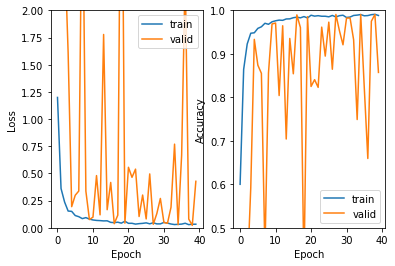

In [ ]:
# Learning curves visualization

plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [ ]:
# Saving

net3.save('/content/gdrive/MyDrive/FDL2022Project/modelli ve/mymodelv3.h5')

<IPython.core.display.Javascript object>

## 4. **Model v4** includes 3 models

### 4l1. **Model v4l1: lasso regularization**

**Architecture Model V4l1**

* Input Layer
* 2d Convolutional layer (3x3 filter, x32, lasso regularizer)
* Relu activation
* Batch Normalization layer
* Max Pooling layer (3x3)
* 2d convolutional Layer (3x3, x64, lasso regularizer)
* Relu activation
* Batch Normalization layer
* Max Pooling layer (3x3)
* 2d Convolutional layer (3x3 filter, x128, lasso regularizer)
* Relu activation
* Batch Normalization layer
* Global Max Pooling layer
* Dense layer (Softmax Activation, lasso regularizer)

In [ ]:
# Architecture definition

inputs = keras.Input((224, 224, 3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l1(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(64, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l1(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(128, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l1(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l1(0.001))(x)
net4l1 = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Architecture summary

net4l1.summary()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

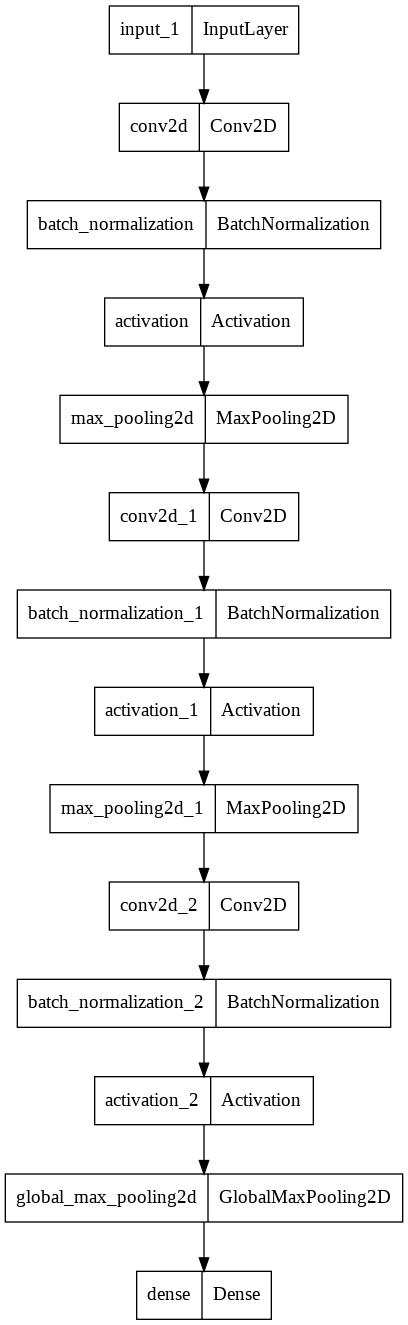

In [ ]:
# Architecture plot

keras.utils.plot_model(net4l1)

In [ ]:
# Compilazione di v4 lasso per addestramento

net4l1.compile(loss = keras.losses.categorical_crossentropy,
               optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
               metrics =['accuracy'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Training

history4l1 = net4l1.fit(train_generatordb_rescale_augm,
                        epochs = 40,
                        validation_data = validation_generatordb_rescale);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/40
120/120 [==============================] - 3171s 26s/step - loss: 3.7675 - accuracy: 0.5938 - val_loss: 4.1949 - val_accuracy: 0.2000
Epoch 2/40
120/120 [==============================] - 55s 459ms/step - loss: 1.8819 - accuracy: 0.8318 - val_loss: 4.4319 - val_accuracy: 0.3375
Epoch 3/40
120/120 [==============================] - 53s 440ms/step - loss: 1.4401 - accuracy: 0.8690 - val_loss: 4.6290 - val_accuracy: 0.3948
Epoch 4/40
120/120 [==============================] - 53s 439ms/step - loss: 1.2689 - accuracy: 0.8807 - val_loss: 1.8633 - val_accuracy: 0.5344
Epoch 5/40
120/120 [==============================] - 53s 439ms/step - loss: 1.0989 - accuracy: 0.8977 - val_loss: 1.0705 - val_accuracy: 0.8594
Epoch 6/40
120/120 [==============================] - 55s 455ms/step - loss: 0.9859 - accuracy: 0.9096 - val_loss: 3.2331 - val_accuracy: 0.5927
Epoch 7/40
120/120 [==============================] - 52s 437ms/step - loss: 0.9093 - accuracy: 0.9089 - val_loss: 1.5275 - val_ac

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

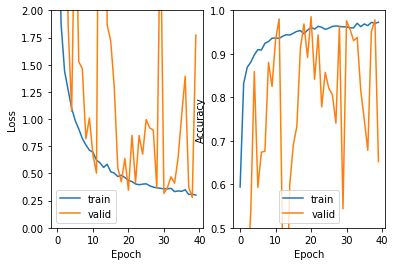

In [ ]:
# Learning curves visualization

plt.subplot(1, 2, 1)
plt.plot(history4l1.history['loss'])
plt.plot(history4l1.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history4l1.history['accuracy'])
plt.plot(history4l1.history['val_accuracy'])
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [ ]:
# Saving

net4l1.save('/content/gdrive/MyDrive/FDL2022Project/modelli ve/4l1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 4l2. **Model v4l2: ridge regularization**

**Architecture Model V4l2**

* Input Layer
* 2d Convolutional layer (3x3 filter, x32, ridge regularizer)
* Relu activation
* Batch Normalization layer
* Max Pooling layer (3x3)
* 2d convolutional Layer (3x3, x64, ridge regularizer)
* Relu activation
* Batch Normalization layer
* Max Pooling layer (3x3)
* 2d Convolutional layer (3x3 filter, x128, ridge regularizer)
* Relu activation
* Batch Normalization layer
* Global Max Pooling layer
* Dense layer (Softmax Activation, ridge regularizer)

In [ ]:
# Architecture definition

inputs = keras.Input((224, 224, 3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(64, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(128, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net4l2 = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

In [ ]:
# Architecture summary

net4l2.summary()

<IPython.core.display.Javascript object>

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        1849

<IPython.core.display.Javascript object>

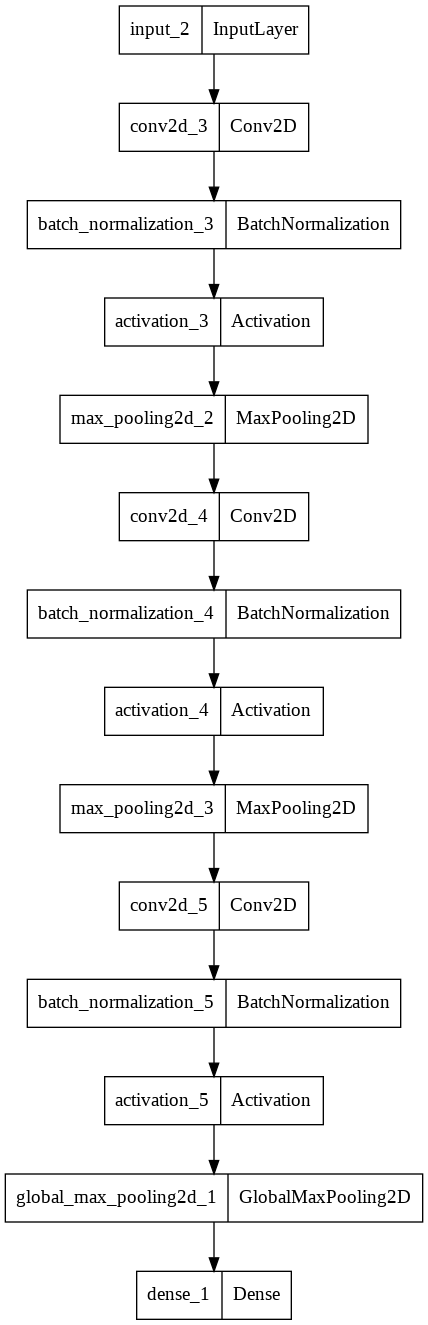

In [ ]:
# Architecture plot

keras.utils.plot_model(net4l2)

In [ ]:
# Network compilation

net4l2.compile(loss = keras.losses.categorical_crossentropy,
               optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
               metrics =['accuracy'])

<IPython.core.display.Javascript object>

In [ ]:
# Training

history4l2 = net4l2.fit(train_generatordb_rescale_augm,
                        epochs = 40,
                        validation_data = validation_generatordb_rescale);

<IPython.core.display.Javascript object>

Epoch 1/40
120/120 [==============================] - 380s 3s/step - loss: 1.4737 - accuracy: 0.5591 - val_loss: 1.9337 - val_accuracy: 0.2010
Epoch 2/40
120/120 [==============================] - 372s 3s/step - loss: 0.5386 - accuracy: 0.8479 - val_loss: 3.7877 - val_accuracy: 0.2000
Epoch 3/40
120/120 [==============================] - 355s 3s/step - loss: 0.3724 - accuracy: 0.9055 - val_loss: 4.1300 - val_accuracy: 0.2396
Epoch 4/40
120/120 [==============================] - 357s 3s/step - loss: 0.3190 - accuracy: 0.9268 - val_loss: 1.9013 - val_accuracy: 0.5729
Epoch 5/40
120/120 [==============================] - 357s 3s/step - loss: 0.2715 - accuracy: 0.9409 - val_loss: 1.4068 - val_accuracy: 0.5469
Epoch 6/40
120/120 [==============================] - 359s 3s/step - loss: 0.2209 - accuracy: 0.9534 - val_loss: 0.5039 - val_accuracy: 0.8240
Epoch 7/40
120/120 [==============================] - 362s 3s/step - loss: 0.1978 - accuracy: 0.9620 - val_loss: 0.2702 - val_accuracy: 0.9406

<IPython.core.display.Javascript object>

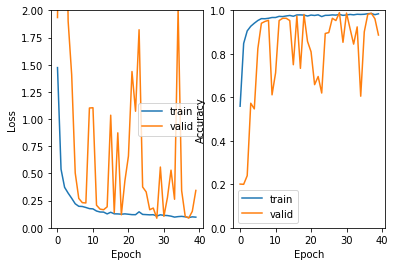

In [ ]:
# Learning curves visualization

plt.subplot(1, 2, 1)
plt.plot(history4l2.history['loss'])
plt.plot(history4l2.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history4l2.history['accuracy'])
plt.plot(history4l2.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [ ]:
# Saving

net4l2.save('/content/gdrive/MyDrive/FDL2022Project/modelli ve/mymodelv4l2.h5')

<IPython.core.display.Javascript object>

### 4l2_5. **Model v4l2_5**

We add **early stopping** to *net4l2*

In [ ]:
# Architecture definition

inputs = keras.Input((224, 224, 3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(64, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(128, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net4l2_5 = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

In [ ]:
# Architecture summary

net4l2_5.summary()

<IPython.core.display.Javascript object>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496 

<IPython.core.display.Javascript object>

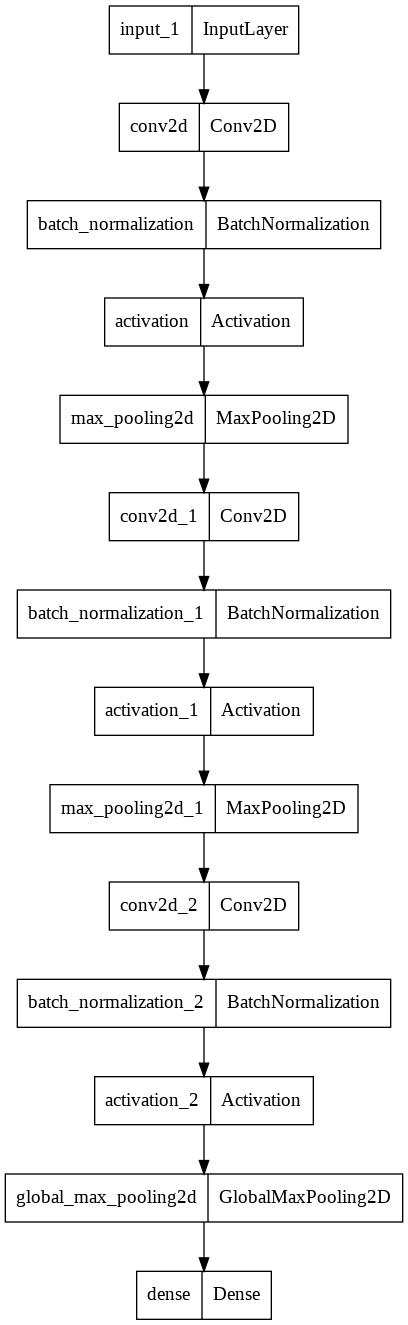

In [ ]:
# Architecture plot

keras.utils.plot_model(net4l2_5)

In [ ]:
# Network compilation

net4l2_5.compile(loss = keras.losses.categorical_crossentropy,
                 optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
                 metrics =['accuracy'])
          

<IPython.core.display.Javascript object>

In [ ]:
# Early stopping

EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                 patience=5)

<IPython.core.display.Javascript object>

In [ ]:
# Training

history4l2_5 = net4l2_5.fit(train_generatordb_rescale_augm,
                            epochs = 40,
                            validation_data = validation_generatordb_rescale,
                            callbacks = [EarlyStopping]);

<IPython.core.display.Javascript object>

Epoch 1/40
120/120 [==============================] - 1126s 9s/step - loss: 1.3107 - accuracy: 0.6036 - val_loss: 2.4562 - val_accuracy: 0.2000
Epoch 2/40
120/120 [==============================] - 382s 3s/step - loss: 0.4977 - accuracy: 0.8628 - val_loss: 5.6073 - val_accuracy: 0.2000
Epoch 3/40
120/120 [==============================] - 354s 3s/step - loss: 0.3441 - accuracy: 0.9159 - val_loss: 3.4413 - val_accuracy: 0.3927
Epoch 4/40
120/120 [==============================] - 351s 3s/step - loss: 0.3015 - accuracy: 0.9339 - val_loss: 8.4760 - val_accuracy: 0.2000
Epoch 5/40
120/120 [==============================] - 359s 3s/step - loss: 0.2520 - accuracy: 0.9464 - val_loss: 1.3918 - val_accuracy: 0.5771
Epoch 6/40
120/120 [==============================] - 352s 3s/step - loss: 0.2293 - accuracy: 0.9557 - val_loss: 0.3574 - val_accuracy: 0.8979
Epoch 7/40
120/120 [==============================] - 351s 3s/step - loss: 0.2132 - accuracy: 0.9581 - val_loss: 0.1328 - val_accuracy: 0.989

<IPython.core.display.Javascript object>

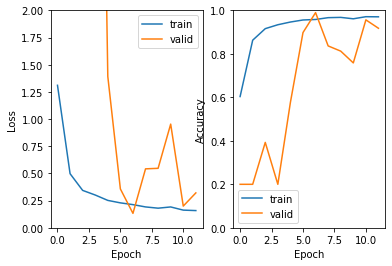

In [ ]:
# Learning curves visualization

plt.subplot(1, 2, 1)
plt.plot(history4l2_5.history['loss'])
plt.plot(history4l2_5.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history4l2_5.history['accuracy'])
plt.plot(history4l2_5.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [ ]:
# Saving

net4l2_5.save('/content/gdrive/MyDrive/FDL2022Project/modelli ve/mymodelv4l2_5.h5')

<IPython.core.display.Javascript object>

##5. **Model v4_5**

We add one **dense layer** composed by 64 hidden neurons.

**Architecture Model V4_5**

* Input Layer
* 2d Convolutional layer (3x3 filter, x32, ridge regularizer)
* Relu activation
* Batch Normalization layer
* Max Pooling layer (3x3)
* 2d convolutional Layer (3x3, x64, ridge regularizer)
* Relu activation
* Batch Normalization layer
* Max Pooling layer (3x3)
* 2d Convolutional layer (3x3 filter, x128, ridge regularizer)
* Relu activation
* Batch Normalization layer
* Global Max Pooling layer
* Dense layer (x64, Softmax Activation, ridge regularizer)
* Dense layer (Softmax Activation, ridge regularizer)

In [ ]:
# Architecture definition

inputs = keras.Input((224, 224, 3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(64, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(128, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

outputs = keras.layers.Dense(num_classes, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net4_5 = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

In [ ]:
# Architecture summary

net4_5.summary()

<IPython.core.display.Javascript object>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496 

<IPython.core.display.Javascript object>

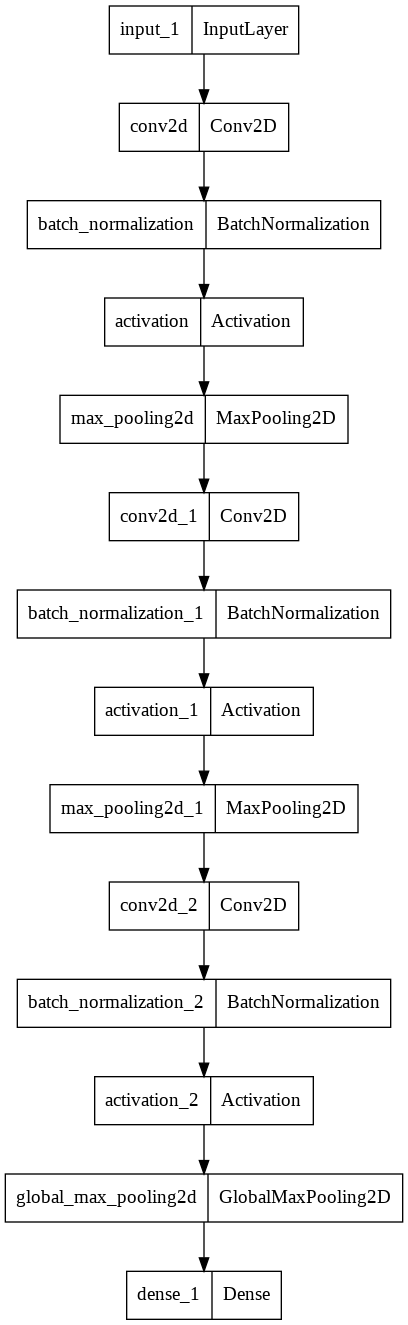

In [ ]:
# Architecture plot

keras.utils.plot_model(net4_5)

In [ ]:
# Network compilation

net4_5.compile(loss = keras.losses.categorical_crossentropy,
               optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
               metrics =['accuracy'])

<IPython.core.display.Javascript object>

In [ ]:
# Training

history4_5 = net4_5.fit(train_generatordb_rescale_augm,
                        epochs = 40,
                        validation_data = validation_generatordb_rescale);

<IPython.core.display.Javascript object>

Epoch 1/40
120/120 [==============================] - 1449s 12s/step - loss: 1.5974 - accuracy: 0.5336 - val_loss: 2.6468 - val_accuracy: 0.2000
Epoch 2/40
120/120 [==============================] - 52s 434ms/step - loss: 0.5522 - accuracy: 0.8477 - val_loss: 4.0031 - val_accuracy: 0.3604
Epoch 3/40
120/120 [==============================] - 54s 448ms/step - loss: 0.3968 - accuracy: 0.9073 - val_loss: 4.3455 - val_accuracy: 0.2417
Epoch 4/40
120/120 [==============================] - 52s 437ms/step - loss: 0.3086 - accuracy: 0.9234 - val_loss: 6.4618 - val_accuracy: 0.2010
Epoch 5/40
120/120 [==============================] - 53s 439ms/step - loss: 0.2675 - accuracy: 0.9383 - val_loss: 1.1877 - val_accuracy: 0.6552
Epoch 6/40
120/120 [==============================] - 52s 434ms/step - loss: 0.2520 - accuracy: 0.9477 - val_loss: 0.3643 - val_accuracy: 0.8969
Epoch 7/40
120/120 [==============================] - 52s 436ms/step - loss: 0.2316 - accuracy: 0.9534 - val_loss: 0.4335 - val_ac

<IPython.core.display.Javascript object>

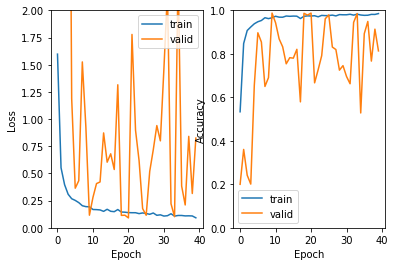

In [ ]:
# Learning curves visualization

plt.subplot(1, 2, 1)
plt.plot(history4_5.history['loss'])
plt.plot(history4_5.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history4_5.history['accuracy'])
plt.plot(history4_5.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [ ]:
# Saving

net4_5.save('/content/gdrive/MyDrive/FDL2022Project/modelli ve/mymodelv4_5.h5')

<IPython.core.display.Javascript object>

Very unstable model. Accuracy on validation has decreased significantly compared to that obtained in Modelv4l2.
However, it is tried to increase the complexity of the fully connected layer again.


##6. **Model v5**

We add one **dense layer** composed by 128 hidden neurons, before the one composed by 64 hidden neurons. In total, the fully connected section of the net is composed 3 dense layer (the last one is the output layer).

**Architecture Model V5**

* Input Layer
* 2d Convolutional layer (3x3 filter, x32, ridge regularizer)
* Relu activation
* Batch Normalization layer
* Max Pooling layer (3x3)
* 2d convolutional Layer (3x3, x64, ridge regularizer)
* Relu activation
* Batch Normalization layer
* Max Pooling layer (3x3)
* 2d Convolutional layer (3x3 filter, x128, ridge regularizer)
* Relu activation
* Batch Normalization layer
* Global Max Pooling layer
* Dense layer (x128, Softmax Activation, ridge regularizer)
* Dense layer (x64, Softmax Activation, ridge regularizer)
* Dense layer (Softmax Activation, ridge regularizer)

In [ ]:
# Architecture definition

inputs = keras.Input((224, 224, 3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding = 'same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(64, 3, padding = 'same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(128, 3, padding = 'same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(128, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.Dense(64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

outputs = keras.layers.Dense(num_classes, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net5 = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

In [ ]:
# Architecture summary

net5.summary()

<IPython.core.display.Javascript object>

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        1849

<IPython.core.display.Javascript object>

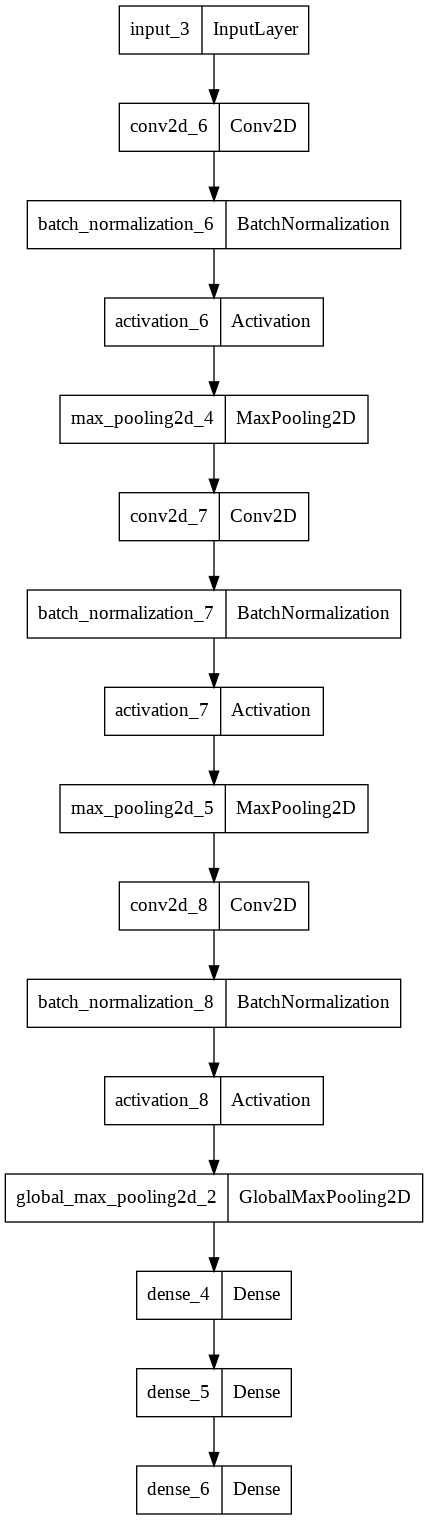

In [ ]:
# Architecture plot

keras.utils.plot_model(net5)

In [ ]:
# Network compilation

net5.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

<IPython.core.display.Javascript object>

In [ ]:
# Training

history5 = net5.fit(train_generatordb_rescale_augm,
                    epochs = 40,
                    validation_data = validation_generatordb_rescale);

<IPython.core.display.Javascript object>

Epoch 1/40
120/120 [==============================] - 75s 604ms/step - loss: 1.5667 - accuracy: 0.4940 - val_loss: 1.9891 - val_accuracy: 0.2000
Epoch 2/40
120/120 [==============================] - 54s 448ms/step - loss: 0.6877 - accuracy: 0.8289 - val_loss: 3.1296 - val_accuracy: 0.2000
Epoch 3/40
120/120 [==============================] - 54s 447ms/step - loss: 0.5056 - accuracy: 0.8878 - val_loss: 2.9380 - val_accuracy: 0.3958
Epoch 4/40
120/120 [==============================] - 54s 452ms/step - loss: 0.4231 - accuracy: 0.9133 - val_loss: 3.9883 - val_accuracy: 0.3250
Epoch 5/40
120/120 [==============================] - 54s 448ms/step - loss: 0.4107 - accuracy: 0.9174 - val_loss: 1.1508 - val_accuracy: 0.5635
Epoch 6/40
120/120 [==============================] - 54s 451ms/step - loss: 0.3298 - accuracy: 0.9367 - val_loss: 0.6643 - val_accuracy: 0.8188
Epoch 7/40
120/120 [==============================] - 54s 449ms/step - loss: 0.3174 - accuracy: 0.9435 - val_loss: 2.9792 - val_ac

<IPython.core.display.Javascript object>

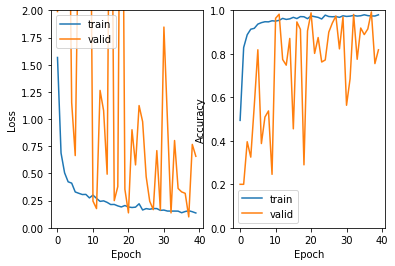

In [ ]:
# Learning curves visualization

plt.subplot(1, 2, 1)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [ ]:
# Saving

net5.save('/content/gdrive/MyDrive/FDL2022Project/modelli ve/mymodelv5.h5')

<IPython.core.display.Javascript object>

##7. **Model v6**

We change the **weight initialization algorithm** in the convolutional layers. We insert the **He initializer** because it might work better in convolutional layers where the activation function is a ReLU.

**Architecture Model V6**

* Input Layer
* 2d Convolutional layer (3x3 filter, x32, ridge regularizer, He uniform inizializer)
* Relu activation
* Batch Normalization layer
* Max Pooling layer (3x3)
* 2d convolutional Layer (3x3, x64, ridge regularizer, He uniform inizializer)
* Relu activation
* Batch Normalization layer
* Max Pooling layer (3x3)
* 2d Convolutional layer (3x3 filter, x128, ridge regularizer, He uniform inizializer)
* Relu activation
* Batch Normalization layer
* Global Max Pooling layer
* Dense layer (Softmax Activation, ridge regularizer)

In [ ]:
# Architecture definition

inputs = keras.Input((224, 224, 3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001), kernel_initializer= tf.keras.initializers.HeUniform(seed=123) )(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(64, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001), kernel_initializer= tf.keras.initializers.HeUniform(seed=123) )(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(128, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001), kernel_initializer= tf.keras.initializers.HeUniform(seed=123) )(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net6 = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

In [ ]:
# Architecture summary

net6.summary()

<IPython.core.display.Javascript object>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496 

<IPython.core.display.Javascript object>

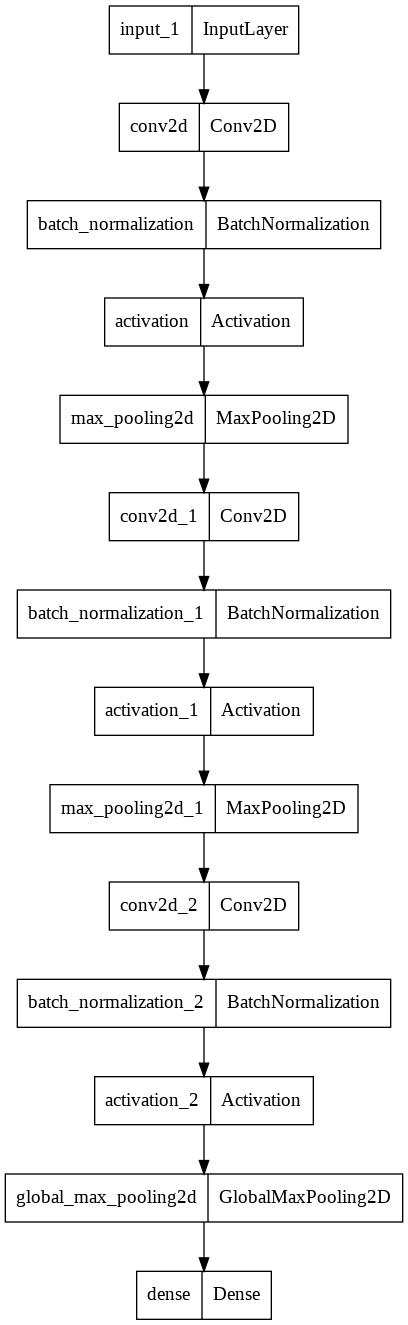

In [ ]:
# Architecture Plot

keras.utils.plot_model(net6)

In [ ]:
# Network compilation

net6.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

<IPython.core.display.Javascript object>

In [ ]:
# Training

history6 = net6.fit(train_generatordb_rescale_augm,
                    epochs = 40,
                    validation_data = validation_generatordb_rescale);

<IPython.core.display.Javascript object>

Epoch 1/40
120/120 [==============================] - 1091s 9s/step - loss: 1.5781 - accuracy: 0.6414 - val_loss: 1.6280 - val_accuracy: 0.4354
Epoch 2/40
120/120 [==============================] - 337s 3s/step - loss: 0.7684 - accuracy: 0.8719 - val_loss: 1.7527 - val_accuracy: 0.3948
Epoch 3/40
120/120 [==============================] - 332s 3s/step - loss: 0.5752 - accuracy: 0.9208 - val_loss: 0.7865 - val_accuracy: 0.7615
Epoch 4/40
120/120 [==============================] - 330s 3s/step - loss: 0.4716 - accuracy: 0.9424 - val_loss: 1.1022 - val_accuracy: 0.6438
Epoch 5/40
120/120 [==============================] - 331s 3s/step - loss: 0.4286 - accuracy: 0.9469 - val_loss: 0.3816 - val_accuracy: 0.9635
Epoch 6/40
120/120 [==============================] - 330s 3s/step - loss: 0.3714 - accuracy: 0.9602 - val_loss: 0.4694 - val_accuracy: 0.9135
Epoch 7/40
120/120 [==============================] - 330s 3s/step - loss: 0.3490 - accuracy: 0.9599 - val_loss: 0.3279 - val_accuracy: 0.971

<IPython.core.display.Javascript object>

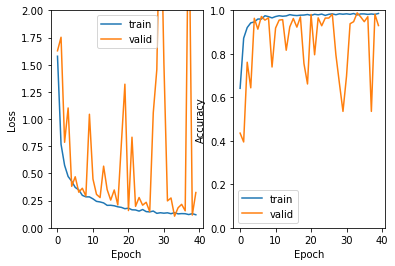

In [ ]:
# Learning curves visualization

plt.subplot(1, 2, 1)
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [ ]:
# Saving

net6.save('/content/gdrive/MyDrive/FDL2022Project/modelli ve/mymodelv6.h5')

<IPython.core.display.Javascript object>

##8. **Model v6_5**

We add **early stopping** to *Model v6*

In [ ]:
# Architecture definition

inputs = keras.Input((224, 224, 3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001), kernel_initializer= tf.keras.initializers.HeUniform(seed=123) )(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(64, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001), kernel_initializer= tf.keras.initializers.HeUniform(seed=123) )(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(128, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(0.001), kernel_initializer= tf.keras.initializers.HeUniform(seed=123) )(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net6_5 = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

In [ ]:
# Architecture summary

net6_5.summary()

<IPython.core.display.Javascript object>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496 

<IPython.core.display.Javascript object>

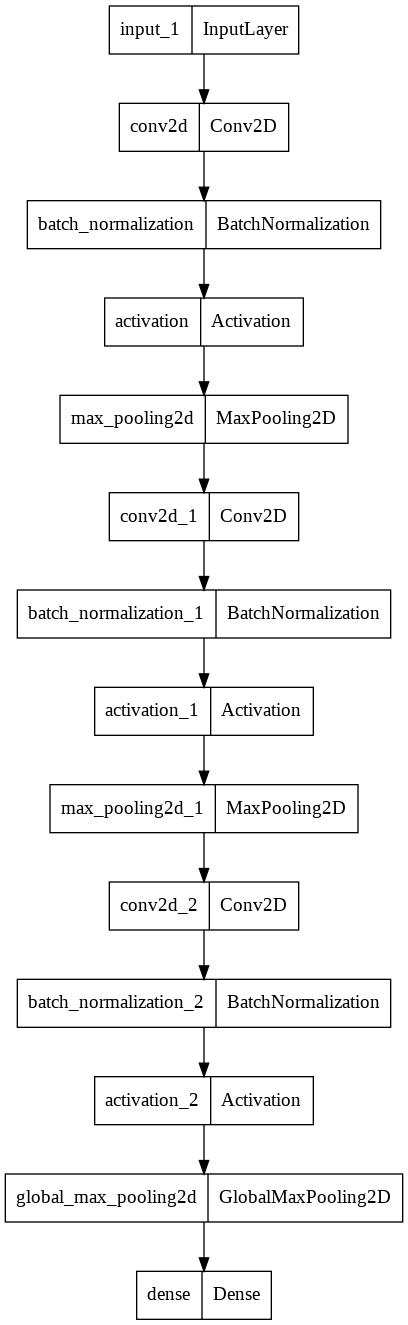

In [ ]:
# Architecture plot

keras.utils.plot_model(net6_5)

In [ ]:
# Network compilation

net6_5.compile(loss = keras.losses.categorical_crossentropy,
               optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
               metrics =['accuracy'])

<IPython.core.display.Javascript object>

In [ ]:
# Early Stopping

EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                 patience=5)

<IPython.core.display.Javascript object>

In [ ]:
# Training

history6_5 = net6_5.fit(train_generatordb_rescale_augm,
                        epochs = 40,
                        validation_data = validation_generatordb_rescale,
                        callbacks = [EarlyStopping]);

<IPython.core.display.Javascript object>

Epoch 1/40
120/120 [==============================] - 1366s 11s/step - loss: 1.5781 - accuracy: 0.6414 - val_loss: 1.6280 - val_accuracy: 0.4354
Epoch 2/40
120/120 [==============================] - 336s 3s/step - loss: 0.7684 - accuracy: 0.8719 - val_loss: 1.7527 - val_accuracy: 0.3948
Epoch 3/40
120/120 [==============================] - 336s 3s/step - loss: 0.5752 - accuracy: 0.9208 - val_loss: 0.7865 - val_accuracy: 0.7615
Epoch 4/40
120/120 [==============================] - 337s 3s/step - loss: 0.4716 - accuracy: 0.9424 - val_loss: 1.1022 - val_accuracy: 0.6438
Epoch 5/40
120/120 [==============================] - 338s 3s/step - loss: 0.4286 - accuracy: 0.9469 - val_loss: 0.3816 - val_accuracy: 0.9635
Epoch 6/40
120/120 [==============================] - 337s 3s/step - loss: 0.3714 - accuracy: 0.9602 - val_loss: 0.4694 - val_accuracy: 0.9135
Epoch 7/40
120/120 [==============================] - 337s 3s/step - loss: 0.3490 - accuracy: 0.9599 - val_loss: 0.3279 - val_accuracy: 0.97

<IPython.core.display.Javascript object>

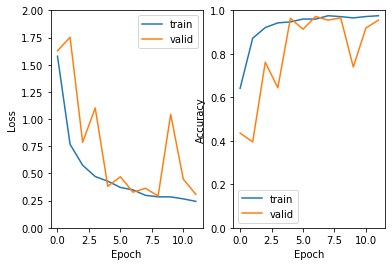

In [ ]:
# Learning curves visualization

plt.subplot(1, 2, 1)
plt.plot(history6_5.history['loss'])
plt.plot(history6_5.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history6_5.history['accuracy'])
plt.plot(history6_5.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [ ]:
# Saving

net6_5.save('/content/gdrive/MyDrive/FDL2022Project/modelli ve/mymodelv6_5.h5')

<IPython.core.display.Javascript object>

## 9. **Model v7**

We add **reduce learning rate** callback to *Model v6*

In [ ]:
# Architecture definition

inputs = keras.Input((224, 224, 3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(), kernel_initializer= tf.keras.initializers.HeUniform(seed=123) )(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(64, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(), kernel_initializer= tf.keras.initializers.HeUniform(seed=123) )(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(128, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(), kernel_initializer= tf.keras.initializers.HeUniform(seed=123) )(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2())(x)
net7 = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

In [ ]:
# Architecture summary

net7.summary()

<IPython.core.display.Javascript object>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496 

<IPython.core.display.Javascript object>

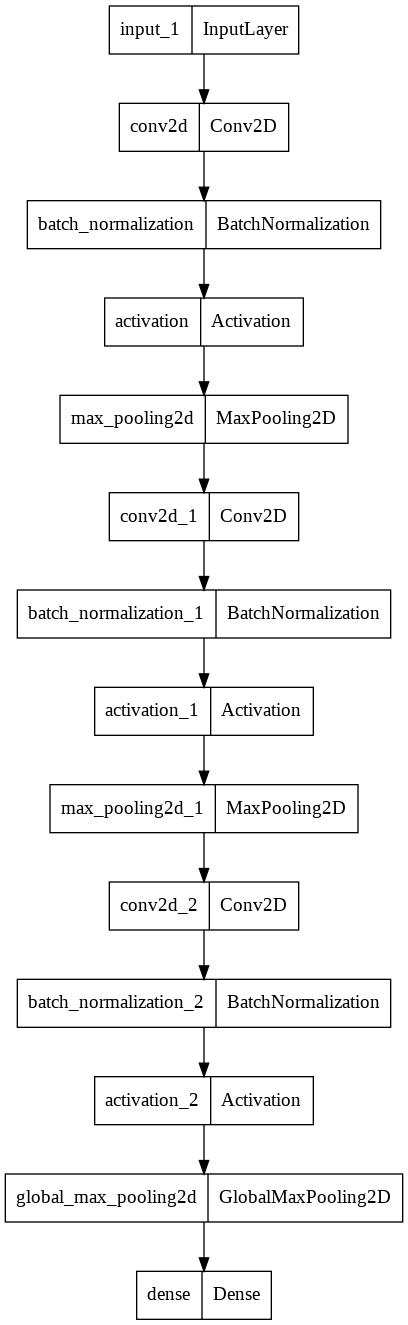

In [ ]:
# Architecture plot

keras.utils.plot_model(net7)

In [ ]:
# Network Compilation

net7.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

<IPython.core.display.Javascript object>

In [ ]:
# Reduce Learning Rate

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', mode='min',patience=3, 
                              verbose=1, factor=0.5, min_lr=0.000001)

<IPython.core.display.Javascript object>

In [ ]:
# Training

history7 = net7.fit(train_generatordb_rescale_augm,
                      epochs = 40,
                      validation_data = validation_generatordb_rescale,
                      callbacks = [reduce_lr]);

<IPython.core.display.Javascript object>

Epoch 1/40
120/120 [==============================] - 1048s 9s/step - loss: 4.9892 - accuracy: 0.6219 - val_loss: 4.1731 - val_accuracy: 0.5208 - lr: 0.0010
Epoch 2/40
120/120 [==============================] - 56s 467ms/step - loss: 2.7639 - accuracy: 0.8477 - val_loss: 2.9846 - val_accuracy: 0.3917 - lr: 0.0010
Epoch 3/40
120/120 [==============================] - 55s 458ms/step - loss: 1.8535 - accuracy: 0.9029 - val_loss: 1.9949 - val_accuracy: 0.7052 - lr: 0.0010
Epoch 4/40
120/120 [==============================] - 54s 453ms/step - loss: 1.3801 - accuracy: 0.9258 - val_loss: 1.9107 - val_accuracy: 0.5865 - lr: 0.0010
Epoch 5/40
120/120 [==============================] - 54s 451ms/step - loss: 1.1195 - accuracy: 0.9268 - val_loss: 1.1497 - val_accuracy: 0.8813 - lr: 0.0010
Epoch 6/40
120/120 [==============================] - 54s 450ms/step - loss: 0.9889 - accuracy: 0.9279 - val_loss: 1.2465 - val_accuracy: 0.7688 - lr: 0.0010
Epoch 7/40
120/120 [==============================] -

<IPython.core.display.Javascript object>

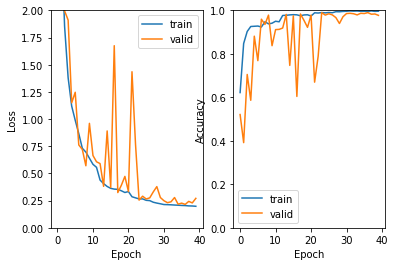

In [ ]:
# Learning curves visualition

plt.subplot(1, 2, 1)
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [ ]:
# Saving

net7.save('/content/gdrive/MyDrive/FDL2022Project/modelli ve/mymodelv7.h5')

<IPython.core.display.Javascript object>

The model achieves very **good performance** on both training and validation. Accuracy on training is 0.996 and Accurac on validation is 0.98. 

In addition, the **model is very stable** in the 20th epoch onwards.

This is chosen to be the **best model from scratch**. 